<a href="https://colab.research.google.com/github/Aaina26/Deep-Learning-Unschool/blob/main/Project_3_Prediction_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#create original data
series=np.cos((0.1*np.arange(500))**2)#wave of the form cos(wt2)


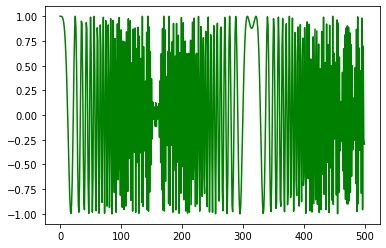

In [4]:
#plot the wave
plt.plot(series,'green')
plt.show()

In [5]:
T=10 #time step..number of previous values that will be used to predict the output
D=1 #dimension or number of features=1
X=[] #input
Y=[] #output
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X=np.array(X)  #.reshape(-1,T)#there was no need to reshape but the commented code can be used if reshape required #converting appended lists to numpy arrays
Y=np.array(Y)
print("X shape",X.shape,"Y shape", Y.shape)

X shape (490, 10) Y shape (490,)


In [6]:
#RNN model
#reshape x to N*T*D where N is number of inputs and Ti stime step and D is dimension
X=X.reshape(-1,T,1)

#make RNN
i=Input(shape=(T,D))#input layer i is created
x=SimpleRNN(10)(i) #10 is number of hidden layers
x=Dense(1)(x) #output layer
model=Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.05),
)


#model train
N=490
r=model.fit(
    X[:-N//2],Y[:-N//2],
    batch_size=32,
    epochs=200,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/200
8/8 [==============================] - 6s 49ms/step - loss: 0.5045 - val_loss: 0.7289
Epoch 2/200
8/8 [==============================] - 0s 22ms/step - loss: 0.4721 - val_loss: 0.7264
Epoch 3/200
8/8 [==============================] - 0s 15ms/step - loss: 0.4497 - val_loss: 0.7202
Epoch 4/200
8/8 [==============================] - 0s 15ms/step - loss: 0.4353 - val_loss: 0.7183
Epoch 5/200
8/8 [==============================] - 0s 15ms/step - loss: 0.4196 - val_loss: 0.7164
Epoch 6/200
8/8 [==============================] - 0s 17ms/step - loss: 0.4101 - val_loss: 0.7120
Epoch 7/200
8/8 [==============================] - 0s 16ms/step - loss: 0.4022 - val_loss: 0.7087
Epoch 8/200
8/8 [==============================] - 0s 15ms/step - loss: 0.3969 - val_loss: 0.7080
Epoch 9/200
8/8 [==============================] - 0s 22ms/step - loss: 0.3914 - val_loss: 0.7035
Epoch 10/200
8/8 [==============================] - 0s 15ms/step - loss: 0.3865 - val_loss: 0.7003
Epoch 11/200
8/8 [=

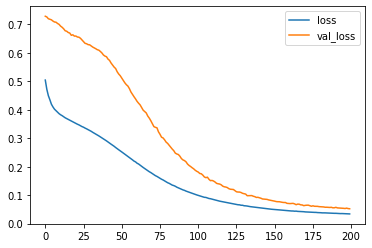

In [7]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

16/16 [==============================] - 0s 3ms/step
(490, 1)


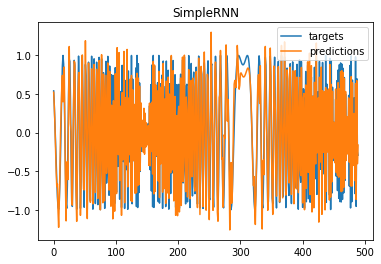

In [8]:
#one step forecast using true targets
outputs=model.predict(X)
print(outputs.shape)
predictions=outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("SimpleRNN")
plt.legend()
plt.show()

1/1 [==============================] - 0s 31ms/step


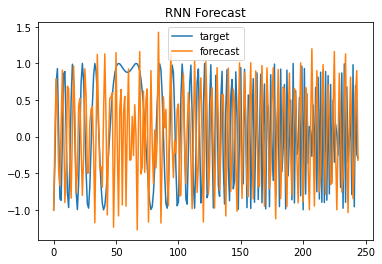

In [12]:
#multistep forecast
#if we want to forecast next value
forecast=[]
input_=X[-N//2]
while len(forecast)<len(Y[-N//2:]):
  f=model.predict(input_.reshape(1,T,1))[0,0]
  forecast.append(f)
  #make new input with latest forecast
  input_=np.roll(input_,-1)
  input_[-1]=f

plt.plot(Y[-N//2:],label='target')
plt.plot(forecast,label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()
